In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150


## Importation des csv

In [124]:
df_olist_customers_dataset = pd.read_csv("data/olist_customers_dataset.csv")
df_olist_order_items_dataset = pd.read_csv("data/olist_order_items_dataset.csv")
df_olist_order_payments_dataset = pd.read_csv("data/olist_order_payments_dataset.csv")
df_olist_order_reviews_dataset = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_olist_orders_dataset = pd.read_csv("data/olist_orders_dataset.csv")
df_olist_products_dataset = pd.read_csv("data/olist_products_dataset.csv")
df_olist_sellers_dataset = pd.read_csv("data/olist_sellers_dataset.csv")
df_product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")

#df_olist_geolocation_dataset = pd.read_csv("data/olist_geolocation_dataset.csv")

In [125]:
df_olist_order_reviews_dataset[df_olist_order_reviews_dataset["order_id"].duplicated(keep=False)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 19:12:30
344,a0a641414ff718ca079b3967ef5c2495,169d7e0fd71d624d306f132acd791cbe,5,NaN,NaN,2018-03-04 00:00:00,2018-03-06 20:12:53
498,505a882ba08a689682a4afc6eb4e5965,1c308eca3f339414a92e518e2a2e5ee9,2,NaN,NaN,2017-12-28 00:00:00,2017-12-31 20:25:02
764,c5976a5a98e854fb23d7e03c6754ae60,2002ea16e75277eaa0b5d78632048540,5,NaN,NaN,2017-08-08 00:00:00,2017-08-10 11:11:29
778,62c7722239b976d943ec0d430cfe890e,1d297b4800ed1a3c5b0944d84c01ee99,3,NaN,NaN,2017-10-22 00:00:00,2017-10-31 15:33:32
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


Dans le dataset des reviews on transforme la colonne review_comment_title et review_comment_message pour obtenir la longueur du message et du titre

In [126]:
from functions import *
df_olist_order_reviews_dataset['length_comment_title'] = df_olist_order_reviews_dataset["review_comment_title"].apply(lambda x:length_str(x))
df_olist_order_reviews_dataset['length_comment_message'] = df_olist_order_reviews_dataset["review_comment_message"].apply(lambda x:length_str(x))
df_olist_order_reviews_dataset.drop(["review_comment_title","review_comment_message"],axis=1,inplace=True)
df_olist_order_reviews_dataset = df_olist_order_reviews_dataset.groupby(["order_id","review_score"]).agg({"length_comment_title":"max","length_comment_message":"max","review_answer_timestamp":"first"})

In [127]:
df_olist_order_reviews_dataset.reset_index(inplace=True)

In [128]:
# Convertir la colonne 'date' en un objet de type datetime
df_olist_order_reviews_dataset['review_answer_timestamp'] = pd.to_datetime(df_olist_order_reviews_dataset['review_answer_timestamp'])

# Groupby order_id et trouver l'index de la date la plus récente pour chaque order_id
latest_dates = df_olist_order_reviews_dataset.groupby('order_id').review_answer_timestamp.idxmax()

# Utilisez l'index trouvé pour sélectionner les lignes avec les dates les plus récentes
df_olist_order_reviews_dataset = df_olist_order_reviews_dataset.loc[latest_dates]


In [129]:
df_olist_order_reviews_dataset[df_olist_order_reviews_dataset["order_id"].duplicated(keep=False)].sort_values(by=["order_id","review_answer_timestamp"],ascending=[True, True])

,order_id,review_score,length_comment_title,length_comment_message,review_answer_timestamp


In [130]:
df_olist_order_reviews_dataset

,order_id,review_score,length_comment_title,length_comment_message,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,5,0,46,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,4,0,0,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,5,0,90,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,4,0,0,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,5,0,39,2017-03-03 10:54:59
...,...,...,...,...,...
98870,fffc94f6ce00a00581880bf54a75a037,5,0,0,2018-05-14 12:53:47
98871,fffcd46ef2263f404302a634eb57f7eb,5,0,0,2018-07-25 09:25:29
98872,fffce4705a9662cd70adb13d4a31832d,5,0,0,2017-10-29 21:33:52
98873,fffe18544ffabc95dfada21779c9644f,5,0,47,2017-08-18 12:24:05


Dans le dataset des produits on remplace les nan de la colonne product_photos_qty par 0.

On remplace les nan de la colonne product_category_name par unknown.

On remplace les nan de la colonne product_description_lenght par 0.

On drop la colonne product_name_lenght.


In [131]:
df_olist_products_dataset["product_photos_qty"].fillna(0,inplace=True)
df_olist_products_dataset["product_photos_qty"] = df_olist_products_dataset["product_photos_qty"].astype('int8')
df_olist_products_dataset["product_category_name"].fillna("unknown",inplace=True)
df_olist_products_dataset["product_description_lenght"].fillna(0,inplace=True)
df_olist_products_dataset.drop("product_name_lenght",axis=1,inplace=True)

In [132]:
df_product = df_olist_products_dataset.merge(df_product_category_name_translation,how="outer",on="product_category_name")
df_product["product_category_name_english"].fillna("unknown",inplace=True)
df_product.drop("product_category_name",axis=1,inplace=True)

Dans le dataset des items on groupe par les colonnes order_id ,product_id et seller_id . Pour obtenir le nombre de ce produit achete dans cet commande pour ce vendeur

In [133]:
def get_mode(x):
    return x.mode().iloc[0]
    
df_olist_order_items_dataset = df_olist_order_items_dataset.groupby(["order_id"]).agg({"product_id":get_mode,"order_item_id":"count","price":"sum","freight_value":"sum"})
df_olist_order_items_dataset.columns=["product_most_frequent",'nb_items', 'sum_price', 'sum_freight_value']
df_olist_order_items_dataset.reset_index(inplace=True)

Regroupement par order_id dans le dataset payments pour obtenir 

In [134]:
df_olist_order_payments_dataset = df_olist_order_payments_dataset.groupby(["order_id"]).agg({"payment_type":lambda x:",".join(set(x)),"payment_sequential":"count","payment_installments":"max","payment_value":"sum"})
df_olist_order_payments_dataset.reset_index(inplace=True)

In [135]:
df_olist_order_payments_dataset["payment_type"]= df_olist_order_payments_dataset["payment_type"].apply(lambda x:'credit_card,voucher' if x == "voucher,credit_card" else x)

In [136]:
df_merge = df_olist_orders_dataset.merge(df_olist_order_reviews_dataset,how="outer",on="order_id")

In [137]:
df_merge = df_merge.merge(df_olist_order_payments_dataset,how="outer",on="order_id")

In [138]:
df_merge = df_merge.merge(df_olist_order_items_dataset,how="outer",on="order_id")

In [139]:
df_merge = df_merge.merge(df_olist_customers_dataset,how="outer",on="customer_id")

In [140]:
df_merge = df_merge.merge(df_product,how="left",right_on='product_id',left_on="product_most_frequent")

In [141]:
# df_merge = df_merge.merge(df_olist_sellers_dataset,how="outer",on="seller_id")

In [142]:
df_merge

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,length_comment_title,length_comment_message,review_answer_timestamp,payment_type,payment_sequential,payment_installments,payment_value,product_most_frequent,nb_items,sum_price,sum_freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,0.0,170.0,2017-10-12 03:43:48,"credit_card,voucher",3.0,1.0,38.71,87285b34884572647811a353c7ac498a,1.0,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,16.0,20.0,2018-08-08 18:37:50,boleto,1.0,1.0,141.46,595fac2a385ac33a80bd5114aec74eb8,1.0,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,0.0,0.0,2018-08-22 19:07:58,credit_card,1.0,3.0,179.12,aa4383b373c6aca5d8797843e5594415,1.0,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,0.0,105.0,2017-12-05 19:21:58,credit_card,1.0,1.0,72.20,d0b61bfb1de832b15ba9d266ca96e5b0,1.0,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,0.0,0.0,2018-02-18 13:02:51,credit_card,1.0,1.0,28.62,65266b2da20d04dbe00c5c2d3bb7859e,1.0,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0,0.0,0.0,2017-03-23 11:02:08,credit_card,1.0,3.0,85.08,ac35486adb7b02598c182c2ff2e05254,1.0,72.00,13.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,ac35486adb7b02598c182c2ff2e05254,1517.0,1.0,1175.0,22.0,13.0,18.0,health_beauty
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0,0.0,44.0,2018-03-02 17:50:01,credit_card,1.0,3.0,195.00,f1d4ce8c6dd66c47bbaa8c6781c2a923,1.0,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,f1d4ce8c6dd66c47bbaa8c6781c2a923,828.0,4.0,4950.0,40.0,10.0,40.0,baby
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0,0.0,28.0,2017-09-22 23:10:57,credit_card,1.0,5.0,271.01,b80910977a37536adeddd63663f916ad,1.0,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vi

<AxesSubplot: >

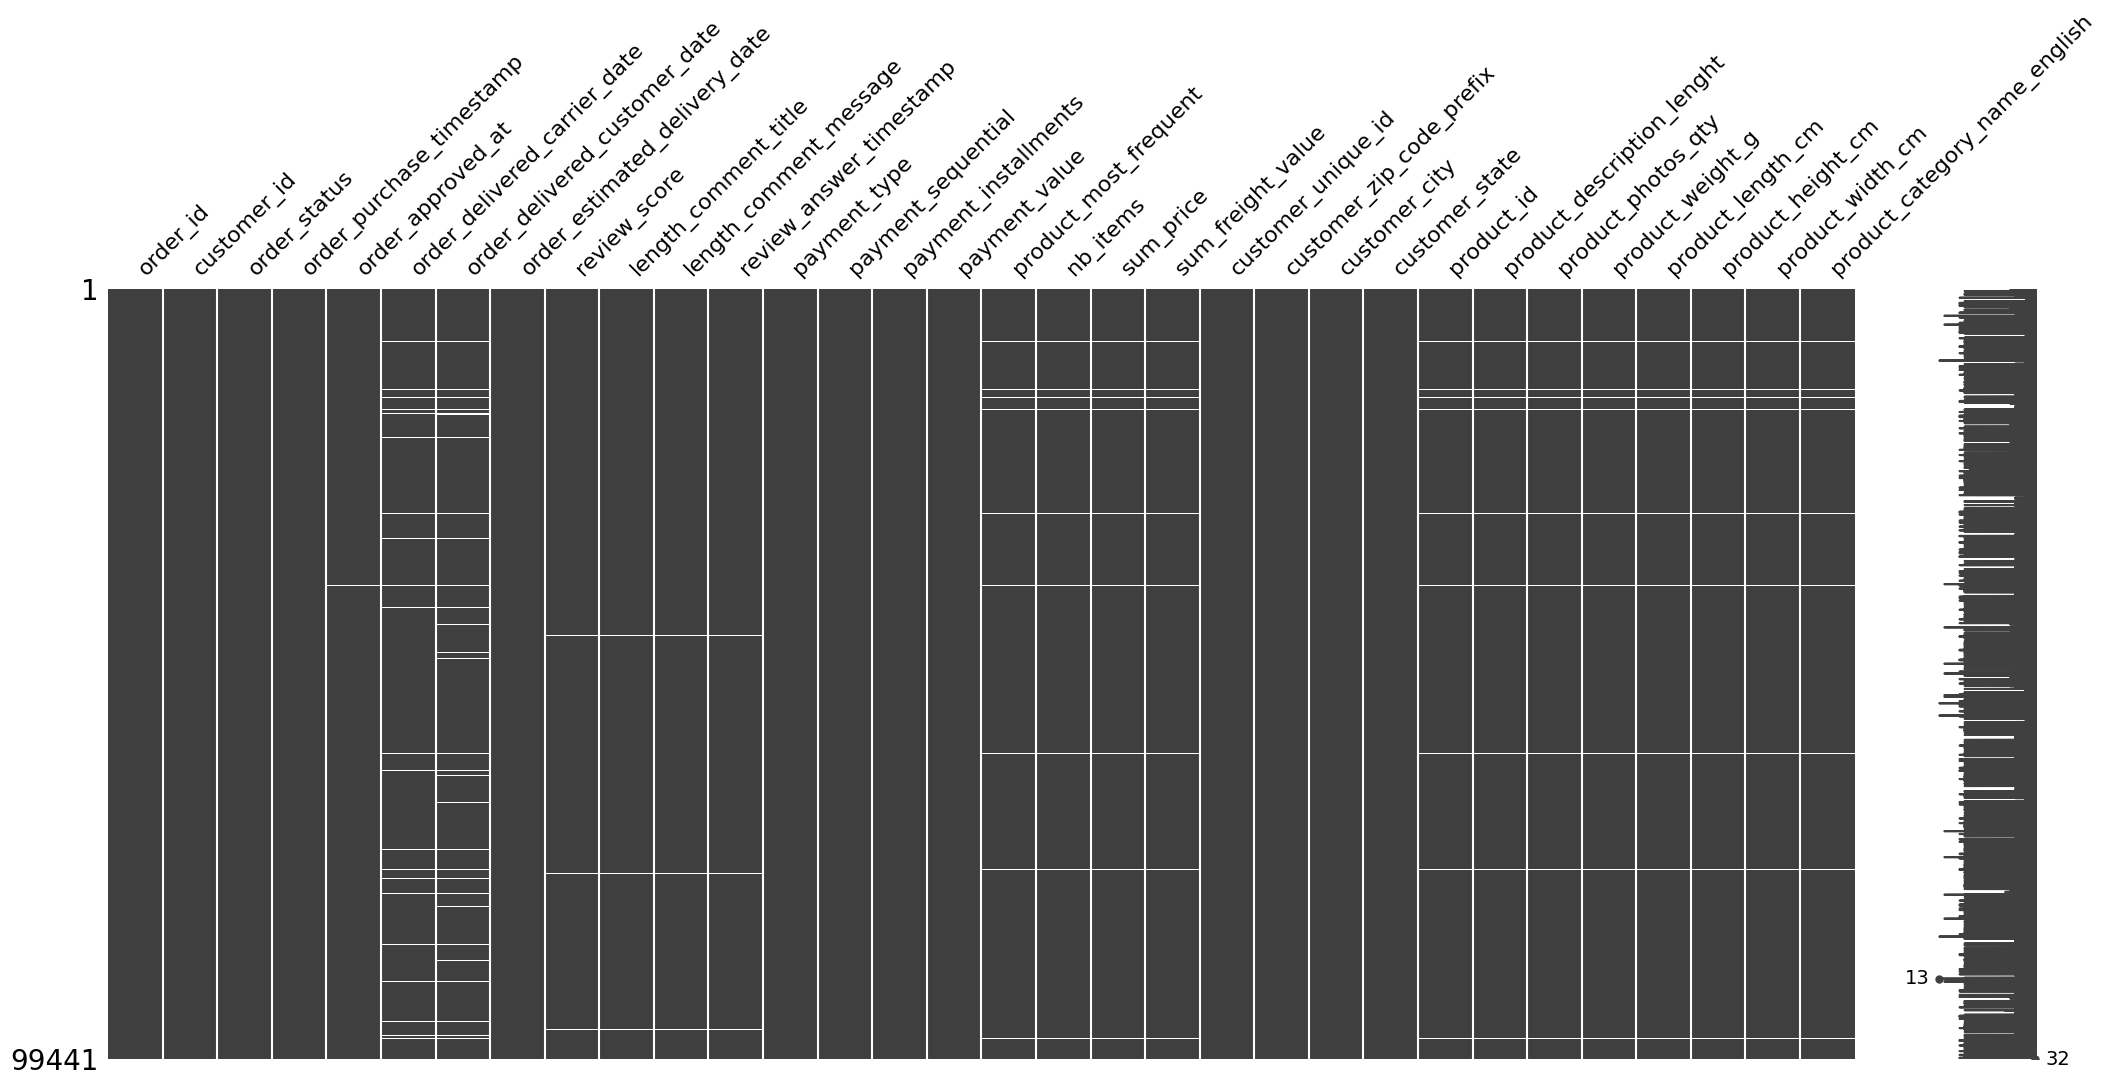

In [143]:
import missingno as msno

msno.matrix(df_merge)

In [144]:
df_merge['order_purchase_timestamp'] = pd.to_datetime(df_merge['order_purchase_timestamp'])
df_merge = df_merge.loc[df_merge['order_purchase_timestamp'].dt.year !=2016]


In [145]:
cat=['housewares', 'baby', 'cool_stuff', 'sports_leisure', 'toys',
       'furniture_decor', 'perfumery', 'health_beauty', 'music',
       'pet_shop', 'computers', 'construction_tools_construction',
       'signaling_and_security', 'auto', 'watches_gifts', 'audio',
       'electronics', 'computers_accessories', 'telephony',
       'consoles_games', 'stationery', 'party_supplies', 'unknown',
       'fashion_male_clothing', 'fashio_female_clothing', 'food',
       'costruction_tools_tools', 'fashion_bags_accessories',
       'garden_tools', 'office_furniture', 'furniture_living_room',
       'market_place', 'bed_bath_table', 'home_confort', 'art',
       'home_construction', 'air_conditioning',
       'agro_industry_and_commerce', 'fixed_telephony',
       'musical_instruments', 'luggage_accessories', 'fashion_sport',
       'fashion_shoes', 'home_appliances',
       'small_appliances_home_oven_and_coffee', 'small_appliances',
       'construction_tools_lights',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'drinks', 'food_drink',
       'books_general_interest', 'home_appliances_2',
       'construction_tools_safety', 'christmas_supplies',
       'furniture_mattress_and_upholstery', 'home_comfort_2',
       'costruction_tools_garden', 'fashion_underwear_beach',
       'arts_and_craftmanship', 'fashion_childrens_clothes',
       'books_technical', 'dvds_blu_ray', 'flowers', 'cds_dvds_musicals',
       'security_and_services', 'tablets_printing_image',
       'furniture_bedroom', 'cine_photo', 'diapers_and_hygiene',
       'books_imported', 'la_cuisine']

maison=['housewares','home_appliances', 'la_cuisine', 'home_confort','home_comfort_2','home_appliances_2', 'office_furniture','home_construction', 'air_conditioning']
outil = ['construction_tools_construction','construction_tools_lights','costruction_tools_tools','construction_tools_safety']
jardinnage=['flowers','costruction_tools_garden', 'garden_tools',]
mobilier_electromenager=['furniture_living_room','small_appliances_home_oven_and_coffee', 'small_appliances','furniture_mattress_and_upholstery', 'kitchen_dining_laundry_garden_furniture','furniture_bedroom','bed_bath_table','furniture_decor']
enfant=['diapers_and_hygiene','baby','toys']
fashion=['fashion_sport', 'fashion_childrens_clothes','fashion_underwear_beach','fashion_shoes','fashion_male_clothing', 'fashio_female_clothing','fashion_bags_accessories',]
sport=['sports_leisure']
auto=['auto','signaling_and_security']
service=['industry_commerce_and_business','agro_industry_and_commerce','security_and_services','market_place']
fete = ['party_supplies','christmas_supplies',]
papeterie=["stationery"]
beaute=['perfumery','health_beauty']
music=['music','musical_instruments','cds_dvds_musicals']
animaux=['pet_shop']
voyage=['luggage_accessories']
informatique=[ 'computers','watches_gifts','audio','fixed_telephony','tablets_printing_image','electronics', 'computers_accessories', 'telephony',]
loisir=['consoles_games','dvds_blu_ray']
alimentation=['food', 'drinks', 'food_drink',]
livre=['books_technical','books_general_interest','books_imported']
inconue=["unknown"]
autre=['cool_stuff']
art=['art','arts_and_craftmanship','cine_photo']

In [146]:
df_merge.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,length_comment_title,length_comment_message,review_answer_timestamp,payment_type,payment_sequential,payment_installments,payment_value,product_most_frequent,nb_items,sum_price,sum_freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,0.0,170.0,2017-10-12 03:43:48,"credit_card,voucher",3.0,1.0,38.71,87285b34884572647811a353c7ac498a,1.0,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [147]:
df_merge.drop(['order_id',"order_approved_at","order_delivered_carrier_date","order_delivered_customer_date", 'payment_sequential',"order_estimated_delivery_date", "product_most_frequent",'product_id',"review_answer_timestamp", 'customer_zip_code_prefix']
      ,axis=1,inplace=True
      )

/tmp/ipykernel_14464/3287683105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge.drop(['order_id',"order_approved_at","order_delivered_carrier_date","order_delivered_customer_date", 'payment_sequential',"order_estimated_delivery_date", "product_most_frequent",'product_id',"review_answer_timestamp", 'customer_zip_code_prefix']


In [148]:
df_merge["length_comment_title"].fillna(0,inplace=True)
df_merge["length_comment_message"].fillna(0,inplace=True)
df_merge["review_score"].fillna(-1,inplace=True)

/tmp/ipykernel_14464/1714723451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge["length_comment_title"].fillna(0,inplace=True)
/tmp/ipykernel_14464/1714723451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge["length_comment_message"].fillna(0,inplace=True)
/tmp/ipykernel_14464/1714723451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge["review_score"].fillna(-1,inplace=True)


In [149]:
df_merge["product_category_name_english"].fillna("indisponible",inplace=True)
df_merge.fillna(-1,inplace=True)

/tmp/ipykernel_14464/861835909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge["product_category_name_english"].fillna("indisponible",inplace=True)
/tmp/ipykernel_14464/861835909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge.fillna(-1,inplace=True)


<AxesSubplot: >

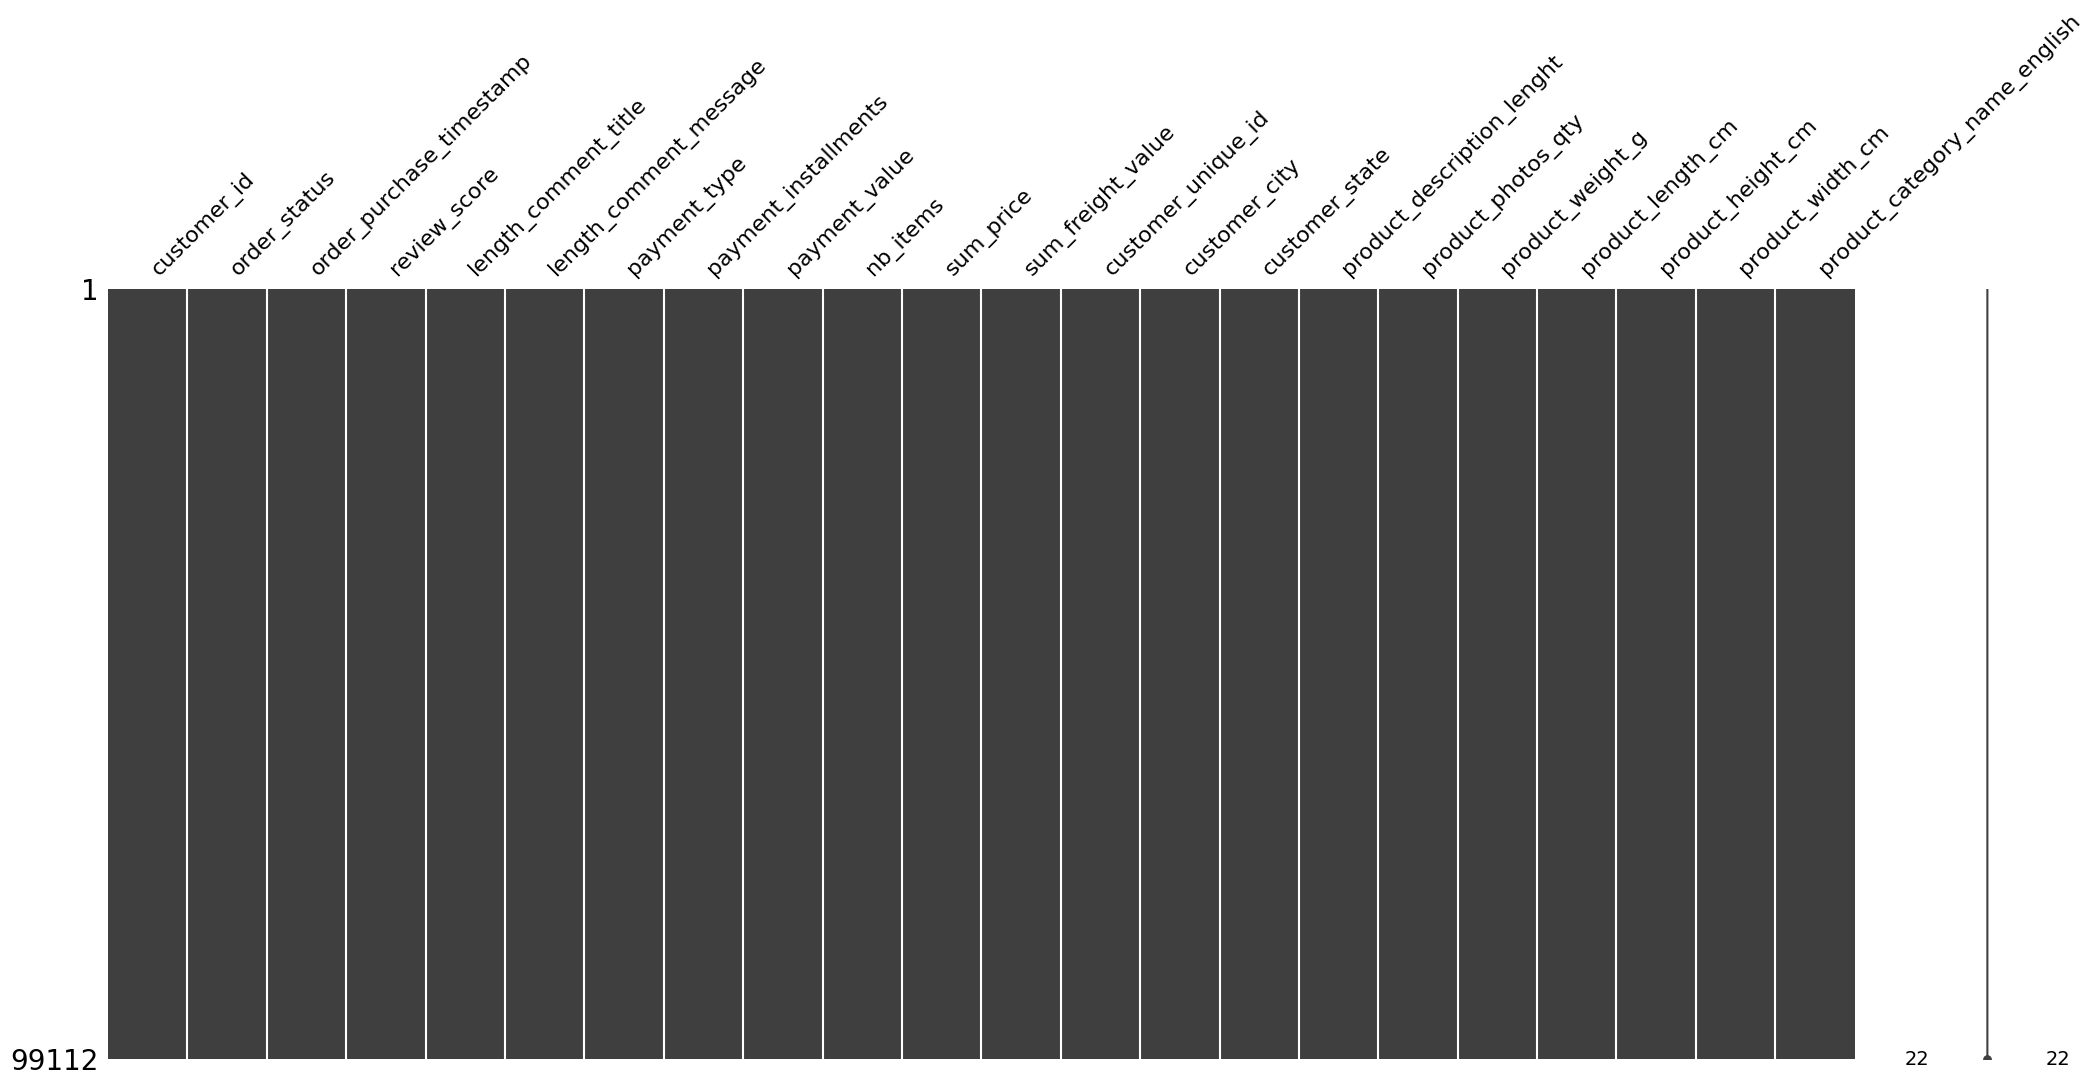

In [150]:
msno.matrix(df_merge)

In [151]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df_merge, title="Pandas Profiling Report")
# profile.to_file(output_file='rapport.html')

In [152]:
df_merge.to_csv("data/data_merge.csv",index=False)